In [69]:
import cv2,os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image




In [70]:
"""
   #Inspired by https://www.kaggle.com/anokas/kuzushiji-mnist-cat
   
    #image resize

import imutils
path_to_files = "letter/"
result_path="resized_letter/"
for _, file in enumerate(os.listdir(path_to_files)):
    img=cv2.imread(path_to_files+file)
    img = imutils.resize(img,25,25)
    cv2.imwrite(result_path+file, img)
"""


'\n    #image resize\n\nimport imutils\npath_to_files = "letter/"\nresult_path="resized_letter/"\nfor _, file in enumerate(os.listdir(path_to_files)):\n    img=cv2.imread(path_to_files+file)\n    img = imutils.resize(img,25,25)\n    cv2.imwrite(result_path+file, img)\n'

In [71]:
"""
#convert letter images  to npz file




from PIL import Image
path_to_files = "resized_letter/"
array_of_images = []

for _, file in enumerate(os.listdir(path_to_files)):
    single_im = Image.open(path_to_files+file)
    single_array = np.array(single_im)
    array_of_images.append(single_array) 
    
np.savez("letter_data.npz",array_of_images) # save all in one file

"""

'\n#convert letter images  to npz file\n\n\n\n\nfrom PIL import Image\npath_to_files = "resized_letter/"\narray_of_images = []\n\nfor _, file in enumerate(os.listdir(path_to_files)):\n    single_im = Image.open(path_to_files+file)\n    single_array = np.array(single_im)\n    array_of_images.append(single_array) \n    \nnp.savez("letter_data.npz",array_of_images) # save all in one file\n\n'

(103, 160)


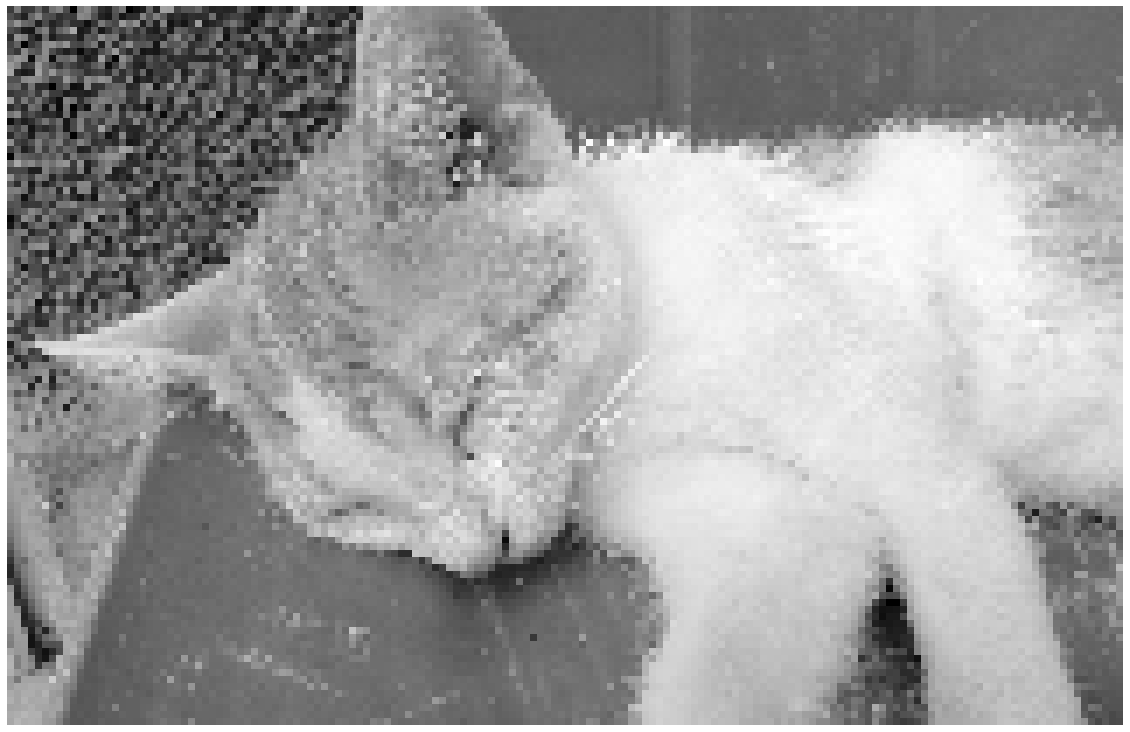

In [72]:
#Load and resize image

img_path="image/test.jpg"

img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)

img=cv2.resize(img,dsize=None,fx=0.2,fy=0.2)


plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(img,cmap='gray')

In [73]:
"""
if error "ValueError: Object arrays cannot be loaded when allow_pickle=False" occured,
type this code.

np.load.__defaults__=(None, True, True, 'ASCII')
"""

'\nif error "ValueError: Object arrays cannot be loaded when allow_pickle=False" occured,\ntype this code.\n\nnp.load.__defaults__=(None, True, True, \'ASCII\')\n'

In [74]:
sample_imgs=np.load('letter_data.npz')['arr_0']


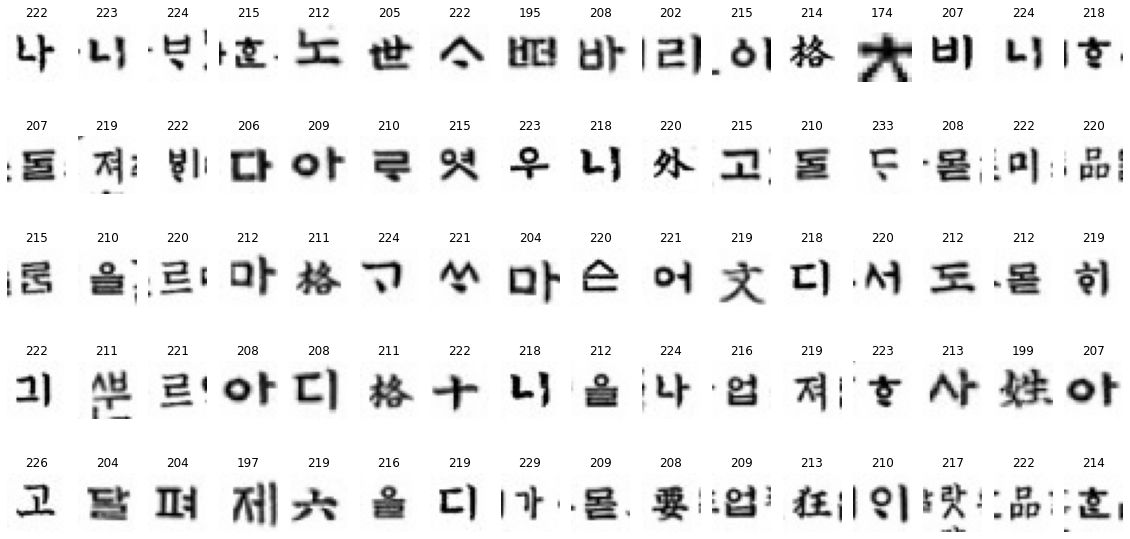

In [75]:
#show letters
plt.figure(figsize=(20,10))
for i in range(80):
    img_patch=sample_imgs[i]

    plt.subplot(5,16,i+1)
    plt.title(int(np.mean(img_patch)))
    plt.axis('off')
    plt.imshow(img_patch,cmap='gray')

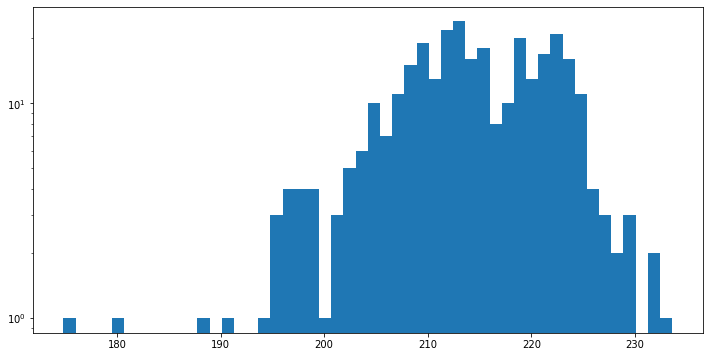

In [76]:
#Summary of letter images

means= np.mean(sample_imgs,axis=(1,2,3))

plt.figure(figsize=(12,6))
plt.hist(means,bins=50,log=True)
plt.show()

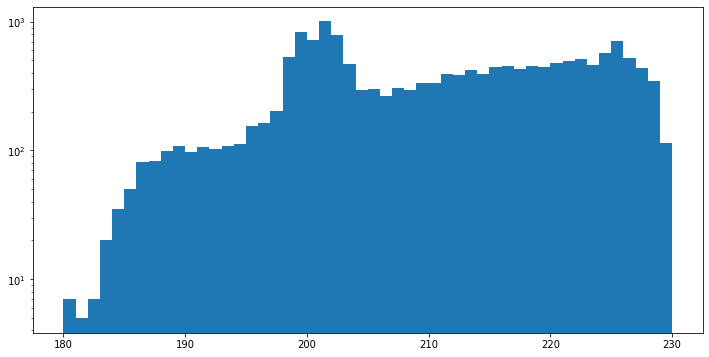

In [77]:
img=cv2.normalize(img,dst=None,alpha=180,beta=230,norm_type=cv2.NORM_MINMAX)
plt.figure(figsize=(12,6))
plt.hist(img.flatten(),bins=50,log=True)
plt.show()

In [78]:
#organize images
bins=defaultdict(list)

for img_patch,mean in zip(sample_imgs,means):
    bins[int(mean)].append(img_patch)

print(len(bins))

42


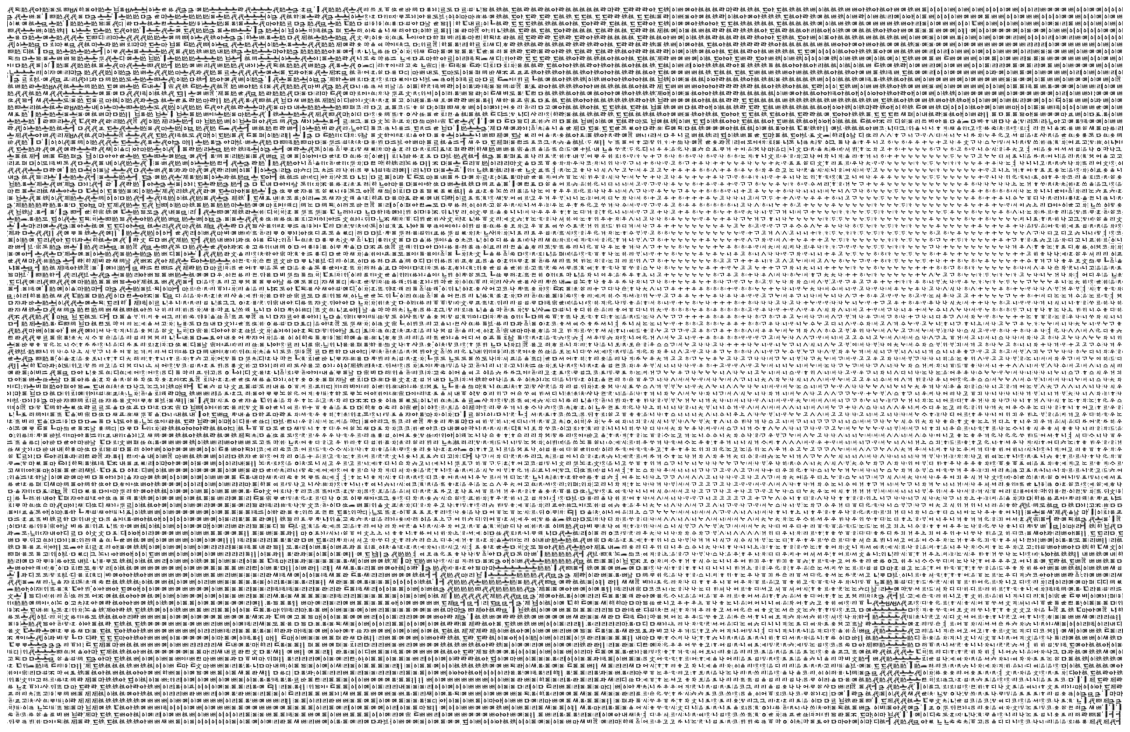

In [85]:
#fill image

h,w = img.shape
img_out = np.zeros((h*25,w*25,),dtype=np.uint8)

for y in range(h):
    for x in range(w):
        
        pixel = img[y,x]

        b=bins[pixel]
        while len(b)==0:
            pixel+=1
            b=bins[pixel]

        img_patch=b[np.random.randint(len(b))][:, :, 0]

        img_out[y*25:(y+1)*25,x*25:(x+1)*25]=img_patch


plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(img_out,cmap='gray')


In [80]:
cv2.imwrite("result/"+'result.jpeg',img_out)

True